# 數字分類
每個 vector 維度的值為 0 的情況下，每個維度隨機出現某一特定數字，並將其分類為該數字 <br><br>
舉例：10 維的 vector<br>
[0 0 1 0 1 0 1 1 1 0]  -> 分類為 1 <br>
[0 3 0 0 0 0 0 0 3 0]  -> 分類為 3 <br>
[0 6 6 0 0 6 0 0 0 0]  -> 分類為 6 <br>
依此類推 ... <br><br>
目標：訓練1個NN，使其能做正確分類

In [162]:
import numpy as np
import pandas as pd
import keras 
from keras.utils import np_utils
import tensorflow as tf

config = tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))
sess = tf.Session(config=config)

In [176]:
# 初始化
train_num = 50000
data_dim = 10
test_num = 10000


x_Train = np.zeros((train_num,data_dim))
y_Train = np.empty((train_num,1))

x_Test = np.zeros((test_num,data_dim))
y_Test = np.empty((test_num,1))

# 產生 data


for i in range(0,train_num):
    arr = np.zeros(data_dim)
    arr = np.random.choice(2,arr.size)  
    randNum = np.random.randint(1,data_dim+1)
    arr[arr == 1]= randNum
    x_Train[i] = arr
    y_Train[i] = randNum

for i in range(0,test_num):
    arr = np.zeros(data_dim)
    arr = np.random.choice(2,arr.size)  
    randNum = np.random.randint(1,data_dim+1)
    arr[arr == 1]= randNum
    x_Test[i] = arr
    y_Test[i] = randNum

# one hot encoding
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [195]:
print(x_Train)
print(y_TrainOneHot)

[[ 8.  0.  8. ...  0.  8.  8.]
 [ 0.  6.  6. ...  0.  0.  6.]
 [ 8.  0.  8. ...  8.  0.  0.]
 ...
 [ 0.  7.  0. ...  7.  0.  0.]
 [10. 10. 10. ... 10.  0.  0.]
 [ 0.  1.  0. ...  1.  1.  0.]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]]


In [165]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

### Build Model

In [196]:
# 建立 NN , 2 hidden layers
model = Sequential()
model.add(Dense(units=data_dim,activation='relu'))
model.add(Dense(units=20,activation='relu'))
model.add(Dense(units=11,activation='softmax'))
model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

### Train model

In [188]:
train_history=model.fit(x=x_Train, 
                        y=y_TrainOneHot,validation_split=0.2, 
                        epochs=100, batch_size=200,verbose=2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
 - 1s - loss: 2.5281 - acc: 0.1158 - val_loss: 2.2037 - val_acc: 0.1482
Epoch 2/100
 - 1s - loss: 2.1016 - acc: 0.1936 - val_loss: 1.9897 - val_acc: 0.2571
Epoch 3/100
 - 1s - loss: 1.8818 - acc: 0.2920 - val_loss: 1.7804 - val_acc: 0.3342
Epoch 4/100
 - 1s - loss: 1.6794 - acc: 0.3556 - val_loss: 1.5885 - val_acc: 0.3877
Epoch 5/100
 - 1s - loss: 1.5174 - acc: 0.4168 - val_loss: 1.4584 - val_acc: 0.4391
Epoch 6/100
 - 1s - loss: 1.4086 - acc: 0.4578 - val_loss: 1.3619 - val_acc: 0.4865
Epoch 7/100
 - 1s - loss: 1.3128 - acc: 0.5071 - val_loss: 1.2588 - val_acc: 0.5447
Epoch 8/100
 - 1s - loss: 1.2071 - acc: 0.5734 - val_loss: 1.1621 - val_acc: 0.6107
Epoch 9/100
 - 1s - loss: 1.1143 - acc: 0.6234 - val_loss: 1.0738 - val_acc: 0.6571
Epoch 10/100
 - 1s - loss: 1.0354 - acc: 0.6601 - val_loss: 1.0085 - val_acc: 0.6664
Epoch 11/100
 - 1s - loss: 0.9561 - acc: 0.6971 - val_loss: 0.9203 - val_acc: 0.7261
Epoch 12/100
 - 1s - los

Epoch 97/100
 - 1s - loss: 0.0251 - acc: 0.9941 - val_loss: 0.0284 - val_acc: 0.9926
Epoch 98/100
 - 1s - loss: 0.0247 - acc: 0.9941 - val_loss: 0.0276 - val_acc: 0.9932
Epoch 99/100
 - 1s - loss: 0.0246 - acc: 0.9940 - val_loss: 0.0276 - val_acc: 0.9931
Epoch 100/100
 - 1s - loss: 0.0254 - acc: 0.9935 - val_loss: 0.0271 - val_acc: 0.9928


In [208]:
def show_train_history(train_acc,val_acc,y_label):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[val_acc])
    plt.title('Train History')
    plt.ylabel(y_label)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

In [209]:
import matplotlib.pyplot as plt

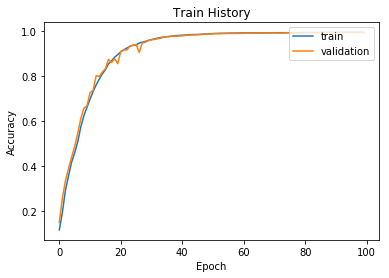

In [210]:
show_train_history('acc','val_acc','Accuracy')

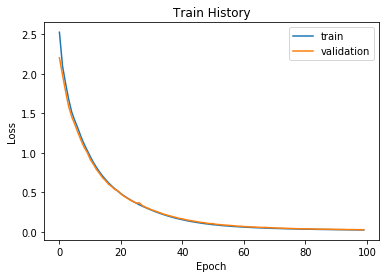

In [211]:
show_train_history('loss','val_loss','Loss')

### Test

In [194]:
scores = model.evaluate(x_Test, y_TestOneHot)
scores[1]

10000/10000 [==============================] - 1s 55us/step


0.9949